<a href="https://colab.research.google.com/github/ChrisGold/DM873-Project-2/blob/main/Pneumonia_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Only for colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import os, shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras import preprocessing
import os, shutil, glob
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

## Load data
### Make sure this file and original dataset in the same directory

In [134]:
# Directory in which we store our dataset

# Old dataset path
original_dataset_dir =  'drive/My Drive/lung/filtered'

# New dataset path
base_dir = 'drive/My Drive/lung/new_set'
# Create a new directory

# New dataset path

#os.mkdir(base_dir)   # comment this line it if you've run it


In [135]:
# Directory in which we store training, validation
# And Create directories of training and validation for normal and pneumonia respectively 

train_dir = os.path.join(base_dir,'train')
#os.mkdir(train_dir)               # comment this line it if you've run it

validation_dir = os.path.join(base_dir,'validation')
#os.mkdir(validation_dir)          # comment this line it if you've run it


train_normal_dir = os.path.join(train_dir, 'NORMAL')
#os.mkdir(train_normal_dir)        # comment this line it if you've run it

train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')
#os.mkdir(train_pneumonia_dir)     # comment this line it if you've run it

validation_normal_dir = os.path.join(validation_dir, 'NORMAL')
#os.mkdir(validation_normal_dir)   # ccomment this line it if you've run it

validation_pneumonia_dir = os.path.join(validation_dir, 'PNEUMONIA')
#os.mkdir(validation_pneumonia_dir)# comment this line it if you've run it


In [6]:
# All jpeg data from old directory
imageList_normal = glob.glob(os.path.join( (original_dataset_dir + '/NORMAL/'), '*.jpeg'))
imageList_pneumonia = glob.glob(os.path.join( (original_dataset_dir + '/PNEUMONIA/'), '*.jpeg'))

# All jpeg data from new directories
imageList_train_normal = glob.glob(os.path.join( (base_dir + '/train/NORMAL/'), '*.jpeg'))
imageList_val_normal = glob.glob(os.path.join( (base_dir + '/validation/NORMAL/'), '*.jpeg'))

imageList_train_pneumonia = glob.glob(os.path.join(  (base_dir + '/train/PNEUMONIA/'), '*.jpeg'))
imageList_val_pneumonia = glob.glob(os.path.join(  (base_dir + '/validation/PNEUMONIA/'), '*.jpeg'))


In [73]:
def is_file(fname_from,imageList):
    check=False
    for f in imageList: 
        fname_to = os.path.basename(f)
        if(fname_to == fname_from):
            check=True
    return check

In [7]:
# \\don't run this again// 
normal_cases_dir =   (original_dataset_dir + '/NORMAL/')    # Old normal path
pneumonia_cases_dir = (original_dataset_dir + '/PNEUMONIA/')# Old pneumonia path


LENTH_DATASET=len(imageList_normal)                # total normal images (as the same as pneumonia images)

split_train_percent=int(LENTH_DATASET*0.8)   #0.8 for train data
split_val_percent=int(LENTH_DATASET-split_train_percent)  #0.2 for train data

count=0

# Split normal data into 80% train and 20% validation
for f in imageList_normal:
    count+=1    
    fname = os.path.basename(f)
    if(count<=split_train_percent and is_file(fname,imageList_train_normal)==False):
        src = os.path.join(normal_cases_dir, fname)
        dst = os.path.join(train_normal_dir, fname)
        shutil.copyfile(src, dst)
    elif(count>split_train_percent and is_file(fname,imageList_val_normal)==False):
        src = os.path.join(normal_cases_dir, fname)
        dst = os.path.join(validation_normal_dir, fname)
        shutil.copyfile(src, dst)
    
count=0

# Split pneumonia data into 80% train and 20% validation
for f in imageList_pneumonia:
    count+=1    
    fname = os.path.basename(f)
    if(count<=split_train_percent and is_file(fname,imageList_train_pneumonia)==False):
        src = os.path. join(pneumonia_cases_dir, fname)
        dst = os.path.join(train_pneumonia_dir, fname)
        shutil.copyfile(src, dst)
    elif(count>split_train_percent and is_file(fname,imageList_val_pneumonia)==False):
        src = os.path.join(pneumonia_cases_dir, fname)
        dst = os.path.join(validation_pneumonia_dir, fname)
        shutil.copyfile(src, dst)
        

In [7]:
print('total training normal images:', len(os.listdir(train_normal_dir)))
print('total training pneumonia images:', len(os.listdir(train_pneumonia_dir)))

print('total validation normal images:', len(os.listdir(validation_normal_dir)))
print('total validation pneumonia images:', len(os.listdir(validation_pneumonia_dir)))

total training normal images: 1072
total training pneumonia images: 1072
total validation normal images: 269
total validation pneumonia images: 269


In [131]:
# Structure of directory

BRANCH = '├─'
LAST_BRANCH = '└─'
TAB = '│  '
EMPTY_TAB = '   '


def get_dir_list(path, placeholder=''):
    folder_list = [folder for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]
    file_list = [file for file in os.listdir(path) if os.path.isfile(os.path.join(path, file))]
    result = ''
    for folder in folder_list[:-1]:
        result += placeholder + BRANCH + folder + '\n'
        result += get_dir_list(os.path.join(path, folder), placeholder + TAB)
    if folder_list:
        result += placeholder + (BRANCH if file_list else LAST_BRANCH) + folder_list[-1] + '\n'
        result += get_dir_list(os.path.join(path, folder_list[-1]), placeholder + (TAB if file_list else EMPTY_TAB))
    return result
if __name__ == '__main__':
    print(get_dir_list('drive/My Drive/lung/new_set'))

├─train
│  ├─PNEUMONIA
│  └─NORMAL
└─validation
   ├─NORMAL
   └─PNEUMONIA



## Data visualization

No Pneumonia


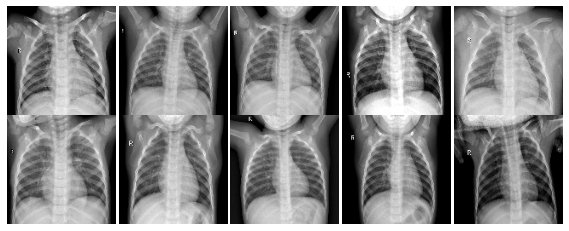

In [132]:
from glob import glob
import cv2
print("No Pneumonia")
multipleImages = glob('drive/My Drive/lung/new_set/train/NORMAL/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:10]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) 
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

Pneumonia


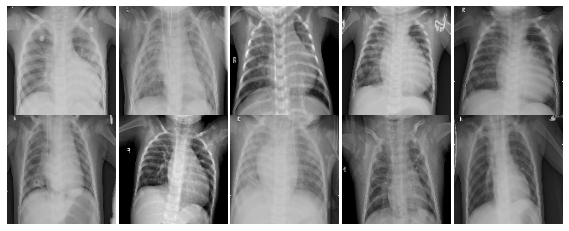

In [133]:
print("Pneumonia")
multipleImages = glob('drive/My Drive/lung/new_set/train/PNEUMONIA/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:10]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) 
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

## DataGenerator and Image augmentation


In [10]:
!pip install nbimporter

In [11]:
import nbimporter   # install it for load ipyb inJupyter
#from my_dataGenerator import DataGenerator  # invoke custom data generator class
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.models import Sequential
import math

In [204]:
#Unused
class DataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dim=(224,224), n_channels=1,
                 n_classes=2, shuffle=True,color_mode='grayscale'):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.color_mode=color_mode,
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            X[i,] = self._load_grayscale_image(ID)
            
            # Store class
            y[i] = self.labels[ID]

        return X,y 

    def _load_grayscale_image(self, image_path):
        """Load grayscale image

        :param image_path: path to image to load
        :return: loaded image
        """
        img = cv2.imread(image_path)
        img = cv2.resize(img, (224,224))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img=img.astype('float')
        img=img.reshape(224,224,1) 
        img = img / 255
        return img

In [205]:
train_0=imageList_train_normal+imageList_val_normal   # all normal images path
lable_train_0=[]
    
lable_train_0 = dict.fromkeys(train_0, 0)             # set normal as 0


train_1=imageList_train_pneumonia+imageList_val_pneumonia  # all pneumonia  images path
lable_train_1=[]
   
lable_train_1 = dict.fromkeys(train_1, 1)      # set pneumonia as 1

lables = {**lable_train_0, **lable_train_1}    # Store both labels into a dictionary 

# lables format as {'./new_set/train/NORMAL\\IM-0115-0001.jpeg': 0, './new_set/train/NORMAL\\NORMAL2-IM-0533-0001.jpeg': 1, ...}


from collections import defaultdict  # install it for easy operate dictionary array

train_d=imageList_train_normal+imageList_train_pneumonia       # all train images path
val_d=imageList_val_normal+imageList_val_pneumonia             # all val images path
all_d=imageList_val_normal+imageList_val_pneumonia+imageList_train_normal+imageList_train_pneumonia# all val images path

partition = defaultdict(list)         #init a dictionary
for j in train_d:    
    partition['train'].append(j)      # Train as key and all train images path as value
for j in val_d:    
    partition['validation'].append(j) # validation as key and all val images path as value  
for j in all_d:    
    partition['all'].append(j) # validation as key and all val images path as value  
  
#  partition format as  {'train': ['./new_set/train/NORMAL\\IM-0115-0001.jpeg', ..], 
# 'validation': ['./new_set/train/NORMAL\\NORMAL2-IM-0533-0001.jpeg']}

In [206]:
# Parameters
params = {'dim': (224,224),
          'batch_size': 32,
          'n_classes': 2,
          'n_channels': 1,
          'shuffle': True}

# Datasets
partition = partition   # path as IDs
labels = lables         # Labels

# Call DataGenerator function from custom class 
training_generator = DataGenerator(partition['train'], labels, **params)
validation_generator = DataGenerator(partition['validation'], labels, **params)

In [106]:
image_width = 224
image_height = 224
batch=32
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,fill_mode = 'nearest',
    
    #channel_shift_range=13,data_format='channels_last',
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_height),
    batch_size=batch,
    color_mode='grayscale',     # Channel 3 to channel 1
    class_mode='binary',
)

val_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_width, image_height),
    batch_size=batch,          # Channel 3 to channel 1
    color_mode='grayscale',
    class_mode='binary'
)

all_generator = train_datagen.flow_from_directory(
    original_dataset_dir,
    target_size=(image_width, image_height),
    batch_size=batch,          # Channel 3 to channel 1
    color_mode='grayscale',
    class_mode='binary'
)

Found 2144 images belonging to 2 classes.
Found 538 images belonging to 2 classes.
Found 2682 images belonging to 2 classes.


# Custom Layers



In [17]:
from math import ceil
from keras.utils import conv_utils
from tensorflow.keras.layers import *
import tensorflow as tf
from tensorflow.keras import activations
from keras import backend as K
import keras.backend as K
from keras import activations
from tensorflow.python.distribute.sharded_variable import ShardedVariable
from tensorflow.python.ops.variables import PartitionedVariable
from typing import Any, Union, Tuple

In [18]:
@tf.keras.utils.register_keras_serializable()
class MaxPooling(Layer):
    """
    The MaxPooling layer takes as arguments the pool size, the strides, and the padding mode.
    The pool size defaults to (2, 2) and if no strides are given, the strides are set to the pool size,
    resulting in non-overlapping pools.
    The padding mode is by default "valid",
    which is fine for the default case that the pool size is significantly smaller than the input.
    MaxPooling implements a 2-Dimensional pooling operation using the backend primitive "max_pool2d".
    MaxPooling divides the 2D input data into pools of a given size and moving window distance and takes
    the largest value of every pool as the output.
    Intuitively, this can be understood as selecting the "most important" feature
    of a small area as a way to downsample data.
    MaxPooling does not have trainable weights; instead it is used
    for "glue logic" in extracting features and downsampling them.
    The pool size acts like a tweakable meta-variable.
    """
    def __init__(self, pool_size=(2, 2), strides=None, padding='VALID', **kwargs):
        """
        The constructor method

        :param pool_size: The size over which the pooling happens
        :param strides: The delta by which to move the pooling window
        :param padding: The padding mode passed on to max_pool2d
        """
        super(MaxPooling, self).__init__(**kwargs)
        self.pool_size = pool_size
        if strides is not None:
            self.strides = strides
        else:
            self.strides = pool_size
        self.padding = padding

    def build(self, input_shape):
        """
        This method builds the layer. Because there are no trainable layers, it just calls to superclass
        :param input_shape: The input shape
        :return: The built layer instance
        """
        super(MaxPooling, self).build(input_shape)

    def call(self, x, **kwargs):
        """
        Invoke this layer on a given input
        :param x: The input
        :return: The output, the result of a maxpooling operation
        """
        y = tf.nn.max_pool2d(x, self.pool_size, self.strides, self.padding)
        return y

    def compute_output_shape(self, input_shape):
        """
        Determines the output shape from the input shape
        :param input_shape: The input shape
        :return: The calculated output shape
        """
        # Round up to compensate for the padding
        rows = ceil(float(input_shape[1]) / float(self.strides[0]))
        cols = ceil(float(input_shape[2]) / float(self.strides[1]))
        return input_shape[0], rows, cols, input_shape[-1]

    #def get_config(self):
    #    config = {'pool_size': self.pool_size,
    #              'padding': self.padding,
    #              'strides': self.strideStride,}
    #             # 'data_format': self.data_format}

    #    base_config = super(MaxPooling, self).get_config()
    #    return dict(list(base_config.items()) + list(config.items()))


    def get_config(self):
        """
        Get the configuration data for serialization.
        :return: The config object from the superclass, updated to include pool_size, strides and padding
        """
        config = super().get_config()
        config.update({
            'pool_size': self.pool_size,
            "strides": self.strides,
            "padding": self.padding,
        })
        return config


In [19]:
@tf.keras.utils.register_keras_serializable()
class Dense(Layer):
    """
    The Dense layer implementation is quite simple. The layer inherits the layer class and takes as arguments units
    and an activation function.
    The unit parameter sets the amount of biases and weights created, as every unit is supposed to have one of each.
    The activation function is set as relu as default,
    since this is a good all-round activation function and commonly used.
    The activation function can be altered if needed.
    The weights are initialized with a random normal function to ensure that the weights have different values
    and do not start out in a symmetrical configuration which might collapse the mapping space.
    The biases are initialized with zeros to avoid adding further complexity and interfering with the weights.
    The layer outputs the dot-product of the input and the weights with the bias added.
    If an activation function is given as an argument, then this is applied to the results before it is outputted.
    """
    def __init__(self, units=32, activation='relu', **kwargs):
        """
        Initializes the Dense layer.
        :param units: The size of the output vector, default is 32
        :param activation: The activation function, default is relu
        """
        super(Dense, self).__init__(**kwargs)
        self.units = units
        self.b = None  # b is initialized in build
        self.w = None  # w is initialized in build
        if activation is not None:
            self.activation = activations.get(activation)
        else:
            self.activation = None

    def build(self, input_shape):
        """
        Builds the layer by creating the bias and w weights.
        :param input_shape: The shape of the input
        :return: The built layer with weights w and b
        """
        self.b = self.add_weight(
            shape=(self.units,),
            initializer=tf.keras.initializers.zeros(),
            trainable=True,
            dtype='float32',
            name='dense_bias',
        )
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            trainable=True,
            initializer=tf.keras.initializers.random_normal(),
            dtype='float32',
            name="dense_weights",
        )
        super(Dense, self).build(input_shape)

    def call(self, x, **kwargs):
        """
        Invokes the layer on an input
        The result is the dot product of the input and the weights,
        to which the bias is added and the activation function is applied
        :param x: The input
        :return: The output
        """
        y = K.dot(x, self.w) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

    def compute_output_shape(self, input_shape):
        """
        Returns the output shape for this dense layer. The output shape is a tuple of the
        :param input_shape:
        :return:
        """
        return input_shape[0], self.units

    def get_config(self):
        """
        Save the parameters to the config object returned from the superclass
        :return: A config object with fields units and activation
        """
        config = super().get_config()
        config.update({
            'units': self.units,
            "activation": self.activation,
        })
        return config

In [20]:
@tf.keras.utils.register_keras_serializable()
class Conv2D(Layer):
    """
    The convolutional layer takes as arguments filters, kernelsize, strides, padding, activation and dilationrate.
    The filters determines how many kernels is applied in each layer and is 32 by default.
    This value is important for the user to tune as a hyperparameter.
    The kernesize determines the size of each kernel to be run over the input and is 3 by 3 as default.
    The parameter strides is initialized to 1 by 1, and does the convolution operation without skipping pixels.
    The user can set activation function to be applied to the results after convolution and before output.
    The parameter padding is set to 'valid',  but the user can specify if they want another type
    of padding at the edges of the image. The dilation rate is set to one to not do any dilution.
    """
    bias: Union[Union[PartitionedVariable, ShardedVariable, Conv2D], Any]
    kernel: Union[Union[PartitionedVariable, ShardedVariable, Conv2D], Any]

    def __init__(self, filters: int = 32, kernel_size: Tuple[int, int] = (3, 3), strides: Tuple[int, int] = (1, 1),
                 padding: bool = 'VALID',
                 activation='relu',
                 dilation_rate=(1, 1), batch_size=1, **kwargs):
        """
        Initialising the Convulutional Layer
        :param filters: The number of filters to use, by default 32
        :param kernel_size: The size of the Kernel to use in the form of a tuple, by default (3,3)
        :param strides: The delta for moving the convolutional window, by default (1,1)
        :param padding: The padding mode for padding the sides, by default VALID
        :param activation: The activation function to apply, by default relu
        :param dilation_rate: The dilation rate, by default (1,1)
        :param batch_size: The batch size, by default 1
        :param kwargs:
        """
        self.filters = filters
        self.bias = None
        self.kernel_size = kernel_size
        self.kernel = None
        self.strides = strides
        self.padding = padding
        # Init activation here to avoid a nasty surprise in the call function
        if activation is not None:
            self.activation = activations.get(activation)
        else:
            self.activation = None
        self.dilation_rate = dilation_rate
        self.batch_size = batch_size
        if K.image_data_format() == 'channels_first':
            self.channel_axis = 0
        else:
            self.channel_axis = -1
        super(Conv2D, self).__init__(**kwargs)

    def build(self, input_shape):
        """
        Initialize the kernel and the bias
        :param input_shape: The shape of the input
        :return: Returns this layer with two weights conv_bias and kernel
        """
        shape = (self.kernel_size[0], self.kernel_size[1], (input_shape[self.channel_axis]), self.filters)
        self.bias = self.add_weight(name='conv_bias',
                                    shape=(self.filters,),
                                    dtype='float32',
                                    initializer=tf.zeros_initializer(),
                                    trainable=True)
        self.kernel = self.add_weight(name='kernel',
                                      shape=shape,
                                      initializer=tf.keras.initializers.GlorotUniform(),
                                      trainable=True)
        super(Conv2D, self).build(input_shape)

    def call(self, x, **kwargs):
        """
        Applies the convolutional operation to the input, adds the bias and applies the activation function
        :param x: The input
        :return: The output
        """
        y = tf.keras.backend.conv2d(x, self.kernel)
        y = K.bias_add(y, self.bias)
        if self.activation is not None:
            y = self.activation(y)
        return y

    def compute_output_shape(self, input_shape):
        """
        Compute the output shape based on the input shape and the parameters
        :param input_shape: The input shape
        :return: A vector describing a the dimensionality of a tensor of rank four
        """
        batch_size = input_shape[0]
        convX = conv_utils.conv_output_length(
            input_shape[1],
            self.kernel_size[0],
            padding=self.padding,
            stride=self.strides[0],
            dilation=self.dilation_rate[0]
        )
        convY = conv_utils.conv_output_length(
            input_shape[2],
            self.kernel_size[1],
            padding=self.padding,
            stride=self.strides[1],
            dilation=self.dilation_rate[1]
        )
        return batch_size, convX, convY, self.filters

    def get_config(self):
        """
        Save config parameters for serialization. This function returns a config object with fields
        filters
        kernel_size
        strides
        padding
        activation
        dilation_rate
        batch_size
        :return: The config object inherited from the superclass function
        """
        config = super().get_config()
        config.update({
            "filters": self.filters,
            "kernel_size": self.kernel_size,
            "strides": self.strides,
            "padding": self.padding,
            "activation": self.activation,
            "dilation_rate": self.dilation_rate,
            "batch_size": self.batch_size,
        })
        return config


# MODEL

In [112]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dropout, SpatialDropout2D, experimental

model = keras.Sequential([

    keras.layers.Input(shape=(image_width, image_height, 1)),
    Conv2D(filters = 64, padding="zero", strides = (3,3)),
    SpatialDropout2D(0.2),
    BatchNormalization(),
    MaxPooling(pool_size=(2,2), strides = (2,2)),


    Conv2D(filters = 128, padding="zero", strides = (3,3)),
    SpatialDropout2D(0.2),
    BatchNormalization(),
    MaxPooling(pool_size=(2,2), strides = (2,2)),


    Conv2D(filters = 256, padding="zero", strides = (3,3)),
    SpatialDropout2D(0.2),
    BatchNormalization(),
    MaxPooling(pool_size=(2,2), strides = (2,2)),


    Conv2D(filters = 512, padding="zero", strides = (3,3)),
    SpatialDropout2D(0.2),
    BatchNormalization(),
    MaxPooling(pool_size=(2,2), strides = (2,2)),


    Conv2D(filters = 1024, padding="zero", strides = (3,3)),
    SpatialDropout2D(0.2),
    BatchNormalization(),
    MaxPooling(pool_size=(2,2), strides = (2,2)),


    layers.Flatten(),
    Dense(units=2048),
    BatchNormalization(),

    Dense(units=1, activation = "sigmoid"),
])


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [113]:
patience = 6

cb = keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=patience, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False
)
model.save('test.h5')
model.save_weights('def.h5')
history = model.fit(train_generator,
                  epochs=1000, #we stop training the model with early stopping
                  validation_data=val_generator,
                  callbacks=[cb]
                  )

model.save('save.h5')
model.save_weights('model_first.h5')

#retrain on the whole dataset for the same epochs as before
model.load_weights('def.h5')
epochs = (len (history.history['loss']) - patience)

history = model.fit(all_generator,
                  epochs = epochs)


model.save_weights('model_w.h5')
model.save('model.h5')

Epoch 1/1000
67/67 [==============================] - 46s 671ms/step - loss: 3.4867 - accuracy: 0.6349 - val_loss: 8.3750 - val_accuracy: 0.5000
Epoch 2/1000
67/67 [==============================] - 44s 660ms/step - loss: 0.8615 - accuracy: 0.7014 - val_loss: 1.0511 - val_accuracy: 0.5000
Epoch 3/1000
67/67 [==============================] - 44s 658ms/step - loss: 0.6628 - accuracy: 0.7233 - val_loss: 3.5501 - val_accuracy: 0.5000
Epoch 4/1000
67/67 [==============================] - 45s 665ms/step - loss: 0.6053 - accuracy: 0.7693 - val_loss: 1.6994 - val_accuracy: 0.5093
Epoch 5/1000
67/67 [==============================] - 44s 658ms/step - loss: 0.5426 - accuracy: 0.7730 - val_loss: 0.6228 - val_accuracy: 0.5818
Epoch 6/1000
67/67 [==============================] - 44s 658ms/step - loss: 0.4956 - accuracy: 0.7865 - val_loss: 1.6763 - val_accuracy: 0.5074
Epoch 7/1000
67/67 [==============================] - 44s 664ms/step - loss: 0.4879 - accuracy: 0.7976 - val_loss: 0.6454 - val_ac

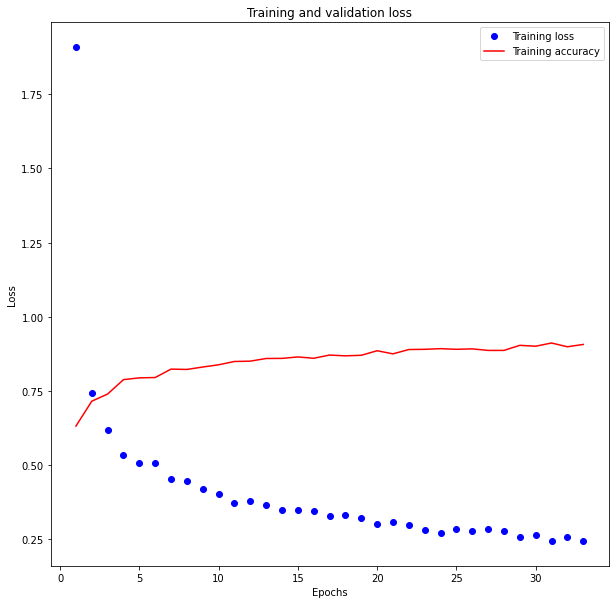

In [136]:
#make a nice picture
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
acc_values = history_dict['accuracy']
#val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
#val_accuracy = history_dict['val_accuracy']

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, acc_values, 'r', label='Training accuracy')
#plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Task 3 - Evaluation

In [129]:
import numpy as np
import tensorflow as tf
import os


class CustomDataGenerator(tf.keras.utils.Sequence):

    def __init__(self, directory, batch_size=5, dim=(224, 224), channels=3, shuffle=True):
        self.directory = directory
        self.batch_size = batch_size
        self.dim = dim
        self.channels = channels
        self.labels = {}
        self.files = []
        self.shuffle = shuffle
        self.on_epoch_end()
        for file in os.listdir(directory + "/NORMAL"):
            self.labels[file] = 0
            self.files.append(file)
        for file in os.listdir(directory + "/PNEUMONIA"):
            self.labels[file] = 1
            self.files.append(file)

    def __len__(self):
        return int(np.floor(len(self.files) / self.batch_size))

    def __getitem__(self, index):
        batch = self.files[index * self.batch_size:(index + 1) * self.batch_size]
        X_test, y_test = self.__convert(batch)
        return X_test, y_test

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.files)

    def __convert(self, batch):
        X_test = np.empty((self.batch_size, *self.dim, self.channels))
        y_test = np.empty(self.batch_size, dtype=int)

        for i, file in enumerate(batch):
            if self.labels[file] == 0:
                single_ch_img = np.genfromtxt(self.directory + "/NORMAL/" + file)
                rescaled_image = single_ch_img * (1/255.)
                X_test[i, ] = np.expand_dims(np.stack((rescaled_image,) * self.channels, axis=-1), axis=0)
                y_test[i] = self.labels[file]
            else:
                single_ch_img = np.genfromtxt(self.directory + "/PNEUMONIA/" + file)
                rescaled_image = single_ch_img * (1 / 255.)
                X_test[i, ] = np.expand_dims(np.stack((rescaled_image,) * self.channels, axis=-1), axis=0)
                y_test[i] = self.labels[file]

            return X_test, y_test

In [130]:
directory = "drive/MyDrive/lung/encoded"

params = {'dim': (224, 224),
              'batch_size': 1,
              'channels': 1,
              'shuffle': True}
print(params)
eval_generator = CustomDataGenerator(directory, **params)

model = keras.models.load_model('drive/MyDrive/long.h5')

model.evaluate(eval_generator)

{'dim': (224, 224), 'batch_size': 1, 'channels': 1, 'shuffle': True}
51/51 [==============================] - 2s 35ms/step - loss: 0.3691 - accuracy: 0.8431


[0.36914196610450745, 0.843137264251709]